# Load Libraries

In [41]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

#statistics tools
import statsmodels.api as sm
import scipy.stats as st
from scipy.stats import shapiro, mannwhitneyu, chi2_contingency

#scikit learn framework
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

numpy version :  1.24.3
pandas version :  2.1.4
seaborn version :  0.13.2


In [18]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")

plt.style.use("fivethirtyeight")

# Load Data

In [40]:
df = pd.read_csv('dataset.csv')
df.sample(20)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
5553,0.0,NaN,0,0.0,11,287.500000,0.000000,0.027273,0.000000,0.0,Oct,2.0,4,2,1,Returning_Visitor,False,False
6992,13.0,314.610714,0,0.0,358,9760.690488,0.000831,0.004094,0.000000,0.0,June,NaN,2,5,1,Returning_Visitor,False,False
10306,4.0,43.225000,0,0.0,13,293.725000,0.022222,0.064259,0.000000,0.0,Nov,NaN,2,3,2,Returning_Visitor,False,False
2153,2.0,129.000000,0,0.0,31,866.700000,0.011828,0.034101,18.111484,0.0,May,3.0,2,6,1,Returning_Visitor,False,True
5783,1.0,12.066667,0,0.0,45,591.264060,0.000000,0.013029,0.000000,0.0,Sep,2.0,2,1,2,Returning_Visitor,False,True
7137,0.0,0.000000,0,0.0,12,1012.200000,0.000000,0.033333,0.000000,0.0,Jul,2.0,2,7,4,Returning_Visitor,False,False
10297,3.0,47.000000,0,0.0,89,3436.975000,0.000000,0.004387,0.000000,0.0,Nov,2.0,2,3,2,New_Visitor,False,True
5192,1.0,10.500000,0,0.0,49,1747.125000,0.027660,0.048014,0.000000,0.2,May,2.0,4,1,4,Returning_Visitor,False,False
3512,4.0,324.500000,0,0.0,30,1456.783333,0.000000,0.009020,30.012882,0.0,May,2.0,2,4,2,Returning_Visitor,False,True
6855,4.0,76.800000,0,0.0,59,NaN,0.010056,0.022338,0.000000,0.0,Jul,2.0,6,2,7,Returning_Visitor,False,False


# **Exploratory Data Analysis (EDA)**


## Describe Data

In [5]:
# Check data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12946 entries, 0 to 12945
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12835 non-null  float64
 1   Administrative_Duration  12313 non-null  float64
 2   Informational            12946 non-null  int64  
 3   Informational_Duration   12946 non-null  float64
 4   ProductRelated           12946 non-null  int64  
 5   ProductRelated_Duration  12307 non-null  float64
 6   BounceRates              12872 non-null  float64
 7   ExitRates                12946 non-null  float64
 8   PageValues               12946 non-null  float64
 9   SpecialDay               12946 non-null  float64
 10  Month                    12946 non-null  object 
 11  OperatingSystems         12422 non-null  float64
 12  Browser                  12946 non-null  int64  
 13  Region                   12946 non-null  int64  
 14  TrafficType           

In [6]:
# Check Null values
df.isna().sum()

Administrative             111
Administrative_Duration    633
Informational                0
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration    639
BounceRates                 74
ExitRates                    0
PageValues                   0
SpecialDay                   0
Month                        0
OperatingSystems           524
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

In [7]:
# Check unique values in each columns
unique_values = df.nunique()
print("\nNumber of unique values in each column:")
print(unique_values)


Number of unique values in each column:
Administrative               27
Administrative_Duration    3223
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9126
BounceRates                1860
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64


In [8]:
# Check duplicated rows
df.duplicated().sum()

711

In [9]:
# Define Numerical and Categorical features
num = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
cat = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType','VisitorType', 'Weekend', 'SpecialDay', 'Revenue']

# Convert categorical features into 'object'
for col in cat:
    df[col] = df[col].astype('object')

In [10]:
# Describe numerical feature
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
count,12835.000000,12313.000000,12946.000000,12946.000000,12946.000000,12307.000000,12872.000000,12946.000000,12946.000000
mean,2.303857,80.370267,0.498841,34.136048,31.657655,1192.740077,0.022309,0.043266,5.875963
std,3.314427,175.494016,1.263276,140.022848,44.202635,1910.216261,0.048681,0.048808,18.414670
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,182.083333,0.000000,0.014286,0.000000
50%,1.000000,7.000000,0.000000,0.000000,18.000000,599.583333,0.003112,0.025329,0.000000
75%,4.000000,92.933333,0.000000,0.000000,38.000000,1470.522917,0.016933,0.050000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742


In [11]:
# Describe categorical features
df[cat].describe()

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,SpecialDay,Revenue
count,12946,12422.0,12946,12946,12946,12946,12946,12946.0,12946
unique,10,8.0,13,9,20,3,2,6.0,2
top,May,2.0,2,1,2,Returning_Visitor,False,0.0,False
freq,3533,6673.0,8360,5031,4100,11072,9929,11636.0,10938


        In the dataset, several columns show null values exceeding 1-2%, specifically Administrative_Duration, ProductRelated_Duration, and OperatingSystems. Additionally, all numeric features exhibit skewness, indicated by higher means compared to medians. Moreover, there are 711 duplicate entries present in the dataset.

        Out of the 12,946 data entries analyzed, the majority—85.5%—did not result in a purchase, while 15.5% completed a purchase. Returning Visitors constituted the largest visitor segment. Weekdays saw higher visitor interactions compared to weekends. May recorded the peak visitor traffic. Operating System 2 and Browser 2 were the most prevalent choices among users. Region 1 accounted for the highest visitor numbers, with Traffic Type 2 being the predominant method of accessing the website.

## Univariate Analysis

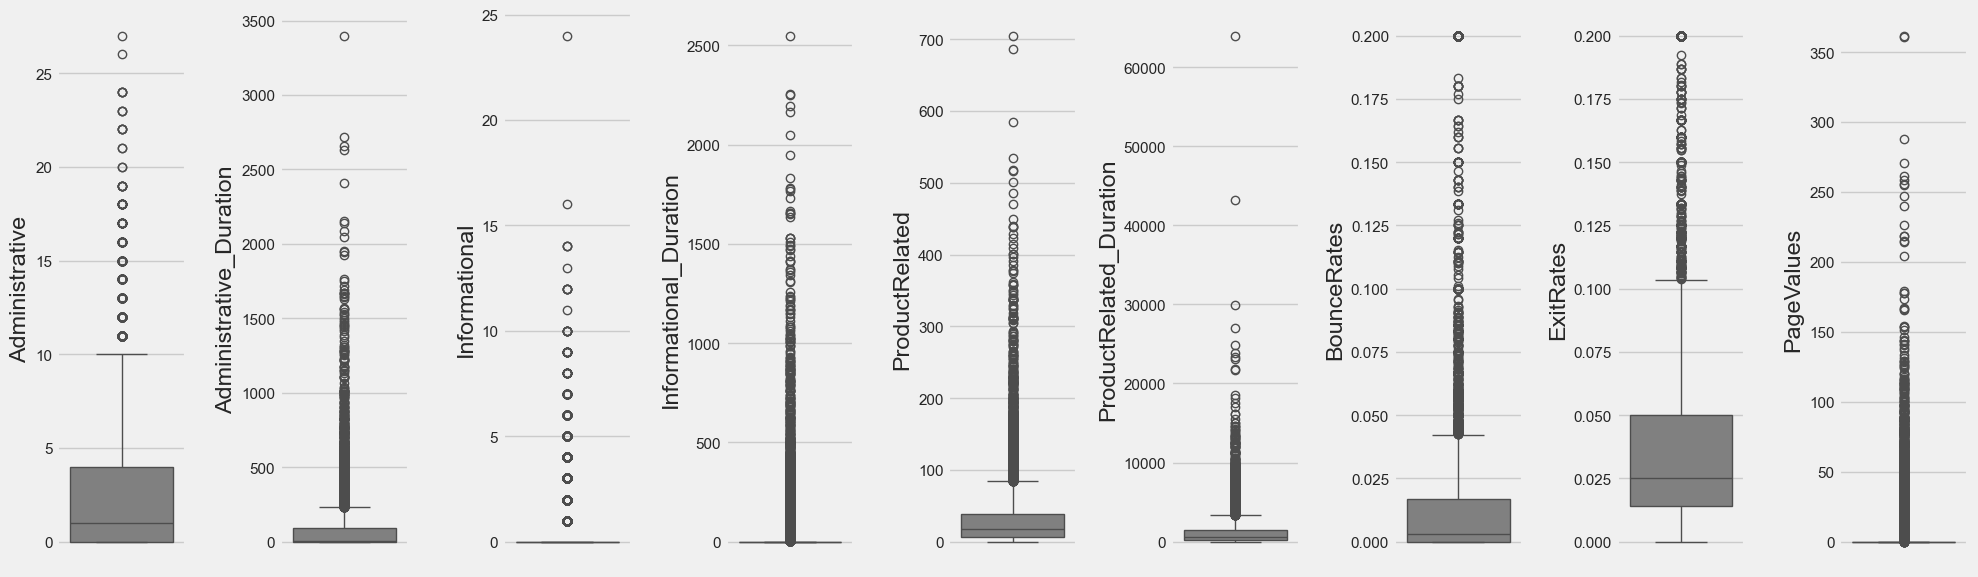

In [12]:
# Create boxplot to see outliers across numerical features
plt.figure(figsize=(20,6))
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(y=df[num[i]], color='grey', orient='v')
    plt.tight_layout()

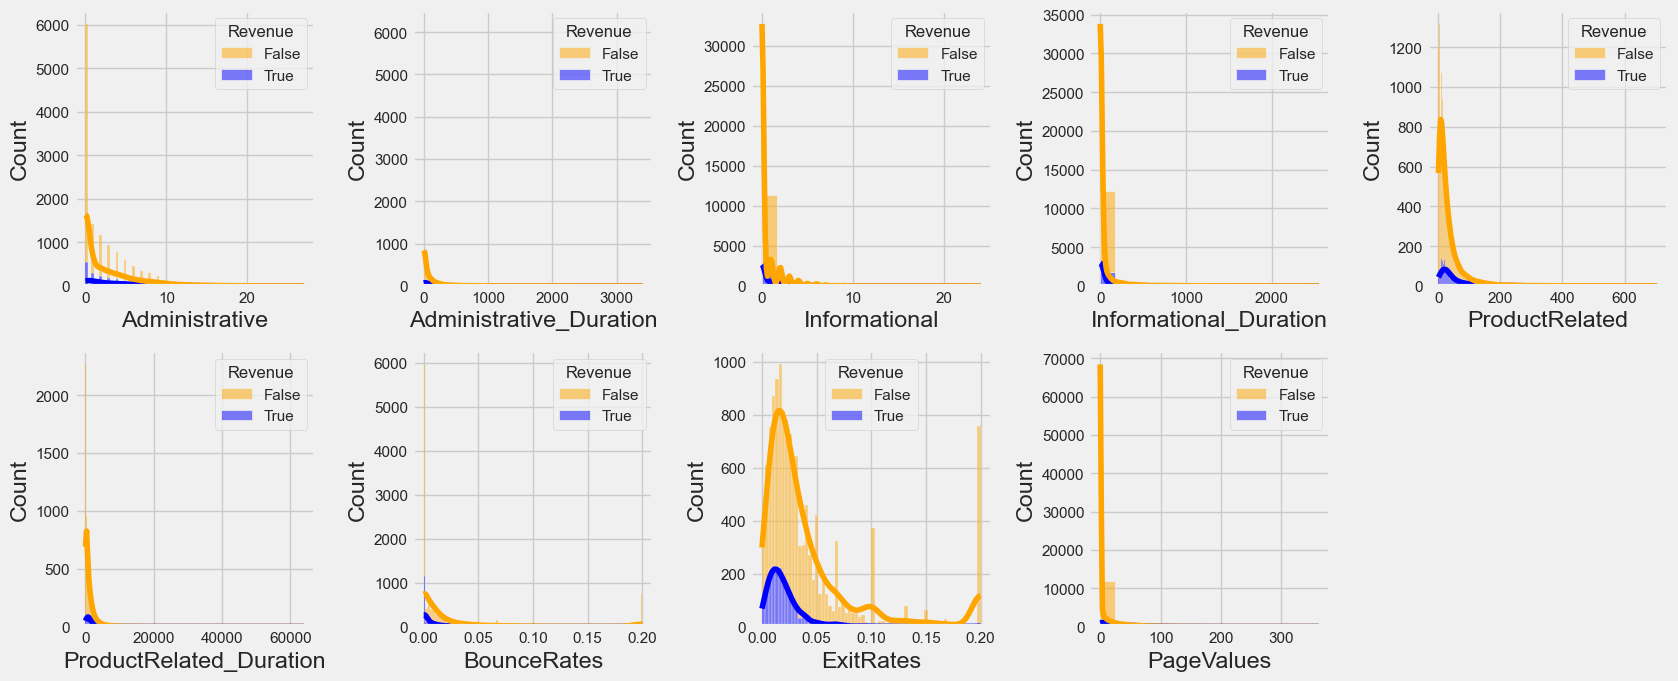

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(17, 10))
for i in range(0, len(num)):
    plt.subplot(3, 5, i+1)
    sns.histplot(df, x=num[i], hue='Revenue', kde=True, palette=['orange', 'blue'], multiple='stack')
    plt.tight_layout()

plt.show()

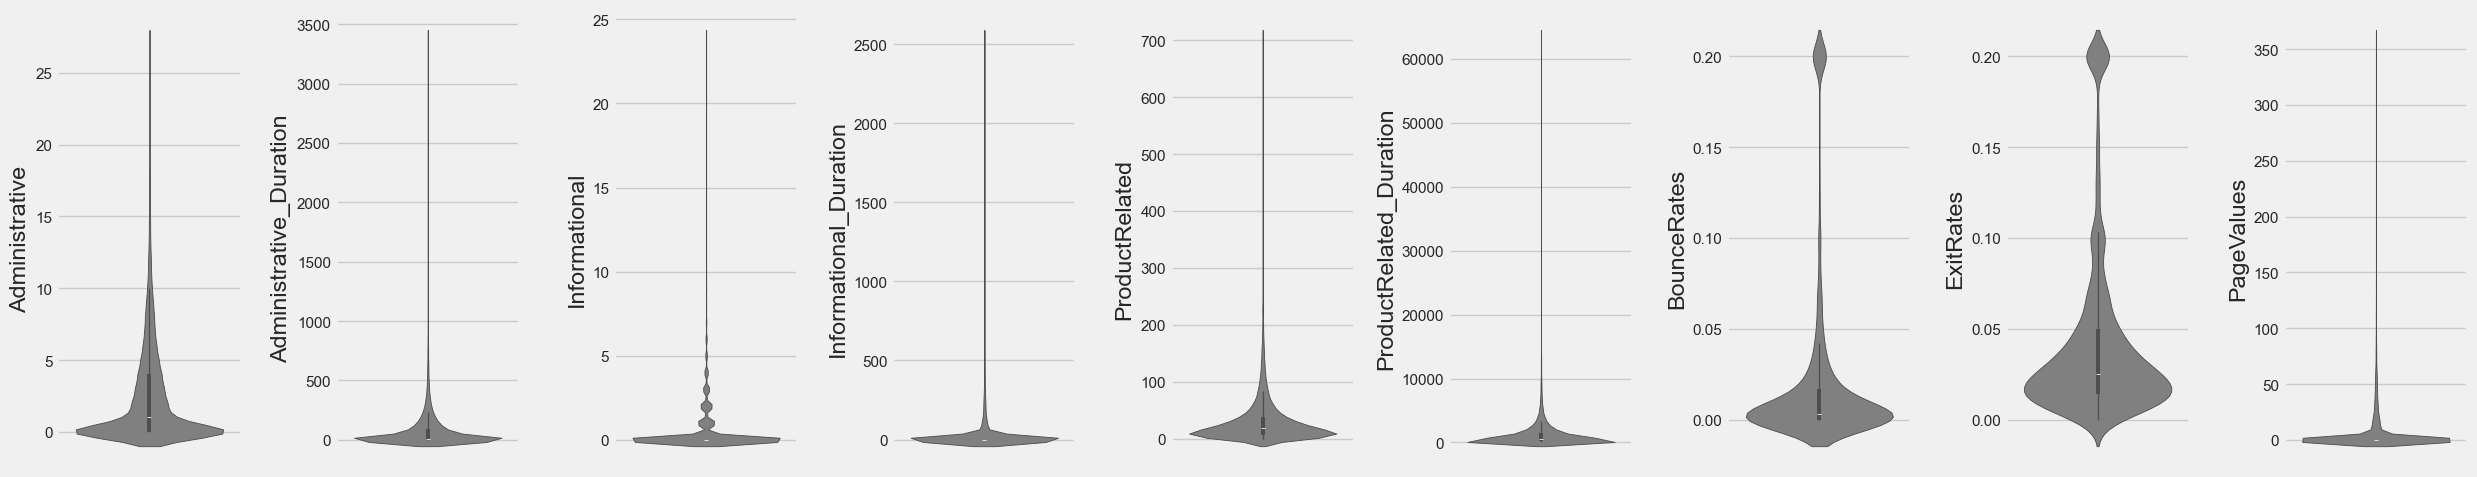

In [14]:
# Create violinplot to see outliers and distrubution
plt.figure(figsize=(25, 5))
for i in range (0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.violinplot(y=df[num[i]], color='grey', orient='v')
    plt.tight_layout()


        From the box plots, it is evident that the numerical features tend to have outliers (long-tailed distributions). Features such as Administrative_Duration, Informational_Duration, ProductRelated, ProductRelated_Duration, and PageValues exhibit outliers with values significantly distant from the median. The distribution plots reveal a positive skewness in the numerical data, with distributions tending towards lower values. Additionally, violin plots indicate a pronounced clustering of data around zero for features like Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, and PageValues. 


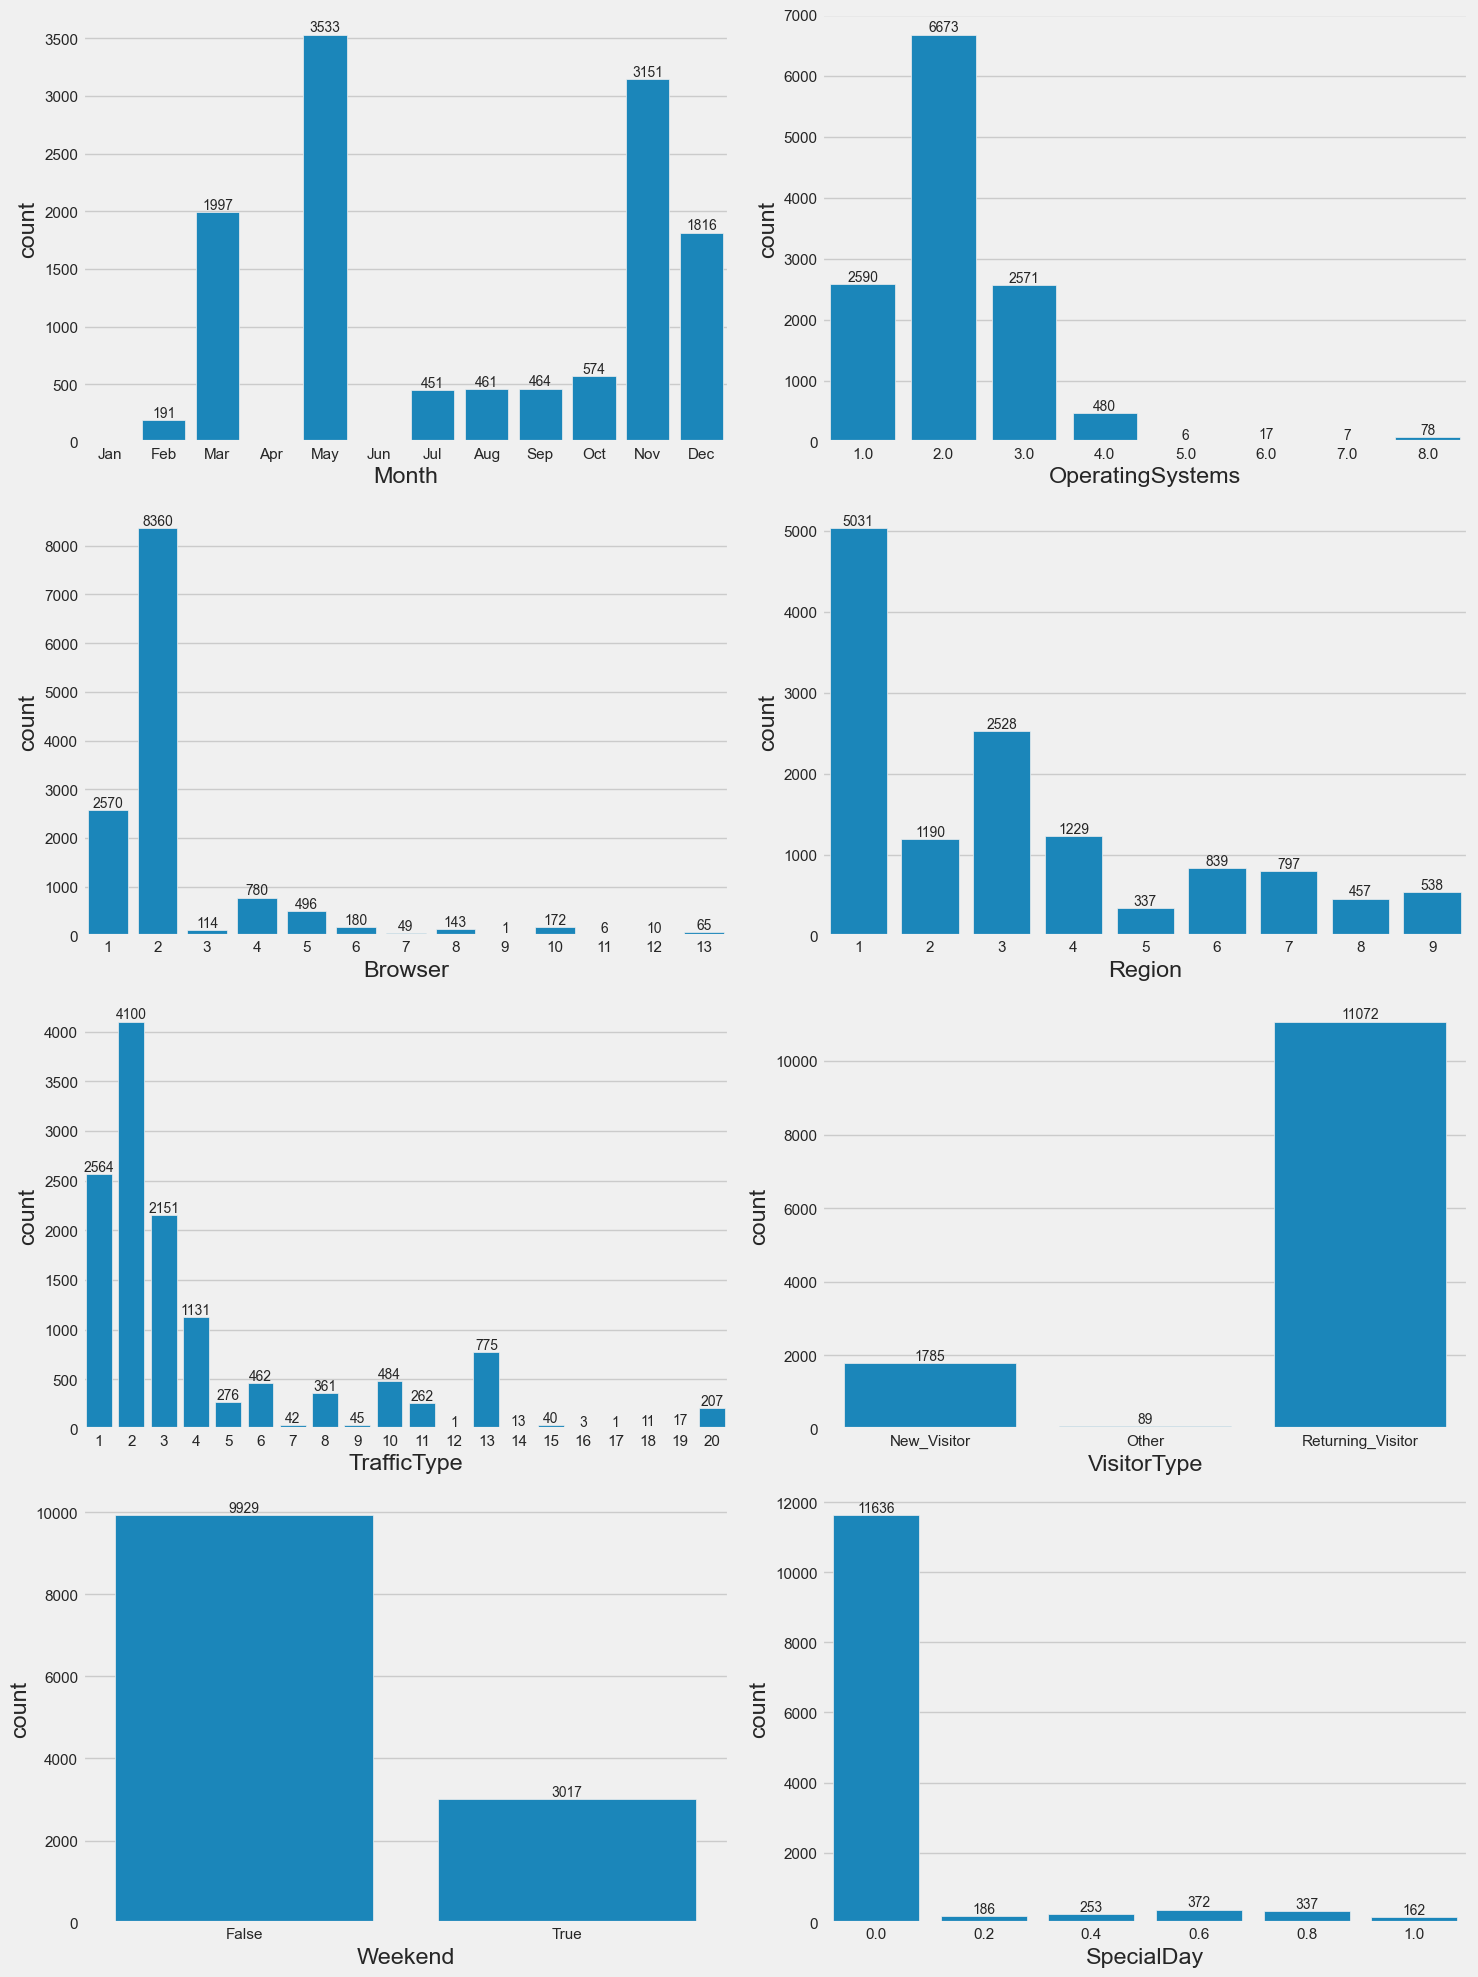

In [15]:
# Create plot to show the distribution in categorical feature

# Define categorical variables
cat = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'SpecialDay']

# Define the order for categorical variables where numerical order is meaningful
cat_order = {
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    'OperatingSystems': sorted(df['OperatingSystems'].dropna().unique()),  # Drop NaN and assume numerical
    'Browser': sorted(df['Browser'].dropna().unique()),  # Drop NaN and assume numerical
    'Region': sorted(df['Region'].dropna().unique()),  # Drop NaN and assume numerical
    'TrafficType': sorted(df['TrafficType'].dropna().unique()),  # Drop NaN and assume numerical
    'VisitorType': sorted(df['VisitorType'].dropna().unique()),  # Drop NaN and assume categorical
    'Weekend': [False, True],  # Assume boolean
    'SpecialDay': sorted(df['SpecialDay'].dropna().unique()),  # Drop NaN and assume numerical
}

plt.figure(figsize=(15, 20))  # Adjust the figure size as needed

# Loop through categories and create subplots
for i in range(len(cat)):
    plt.subplot(math.ceil(len(cat) / 2), 2, i + 1)
    
    # Filter out NaN values in the plot data
    data_to_plot = df.dropna(subset=[cat[i]])
    
    plot = sns.countplot(data=data_to_plot, x=cat[i], order=cat_order.get(cat[i], None))
    
    # Add annotations above each bar with smaller text size
    for p in plot.patches:
        height = p.get_height()
        plot.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{height:.0f}', ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()



    The data highlights significant trends across categorical variables: May, November, and March recorded peak visitor activity. Operating System 2.0 and Browser 2 were notably preferred over alternatives. Region 1 emerged as the largest visitor segment, with Traffic Type 2 being the primary access method. Returning Visitors formed the majority, reflecting a loyal user base. Non-weekend days showed higher visitor engagement compared to weekends. Most visits occurred on regular days without special promotions, and False values outnumbered True, indicating common absence of certain conditions.

### Multivariate Analysis

#### Numerical features corelation

In [25]:
# Create new column to convert 'Revenue' into interger
df['Rev'] = df['Revenue'].astype(float).astype(int)

In [26]:
# Define numerical variable
nums = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'Rev']

<Axes: >

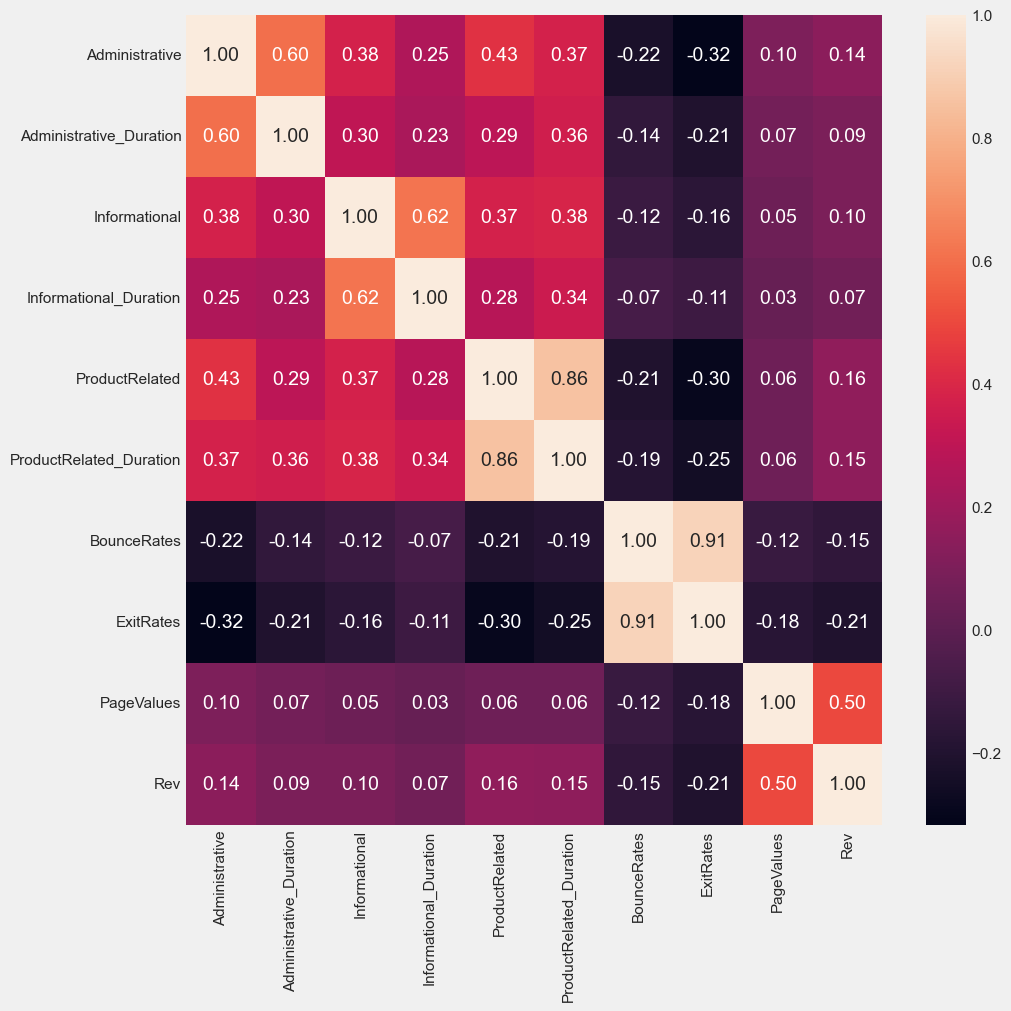

In [27]:
# Create heatmap to see corelation between numerical features
plt.figure(figsize=(10,10))
sns.heatmap(df[nums].corr(), annot=True, fmt='.2f')

    There is a high multicollinearity (> 0.7) between the features ExitRates and BounceRates, suggesting that one of them could be dropped to mitigate redundancy in the model. Additionally, several features show potentially redundant values due to their significantly high correlations: Administrative with Administrative_Duration, Informational with Informational_Duration, ProductRelated with ProductRelated_Duration, and BounceRates with ExitRates. Therefore, dropping one of each pair could help reduce redundancy and improve the effectiveness of the model by simplifying its feature set. Feature PageValues has high correlation due to its nature as values for page that contribures to revenue generation.

### Bi-Variate Analysis

#### Conversion Count accross Categorucal Features

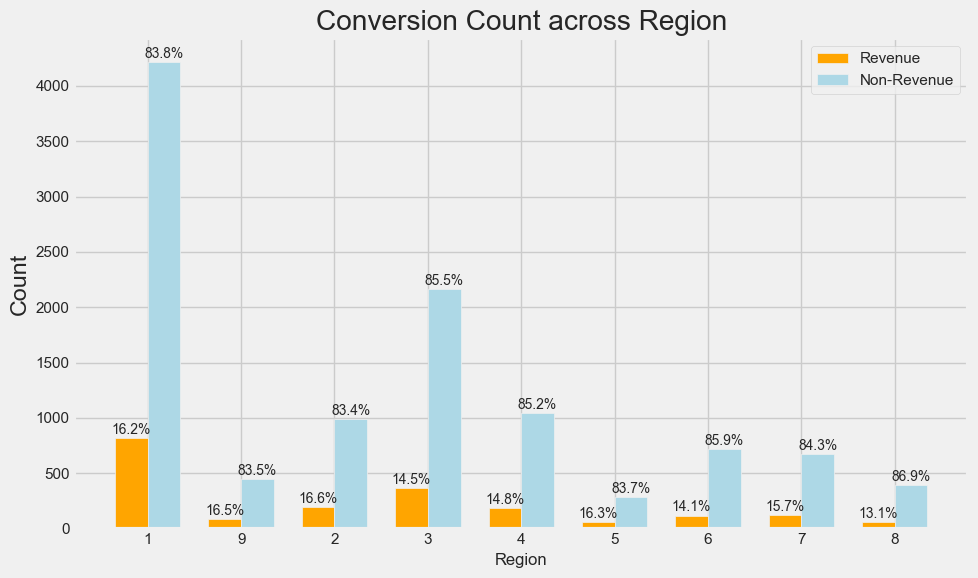

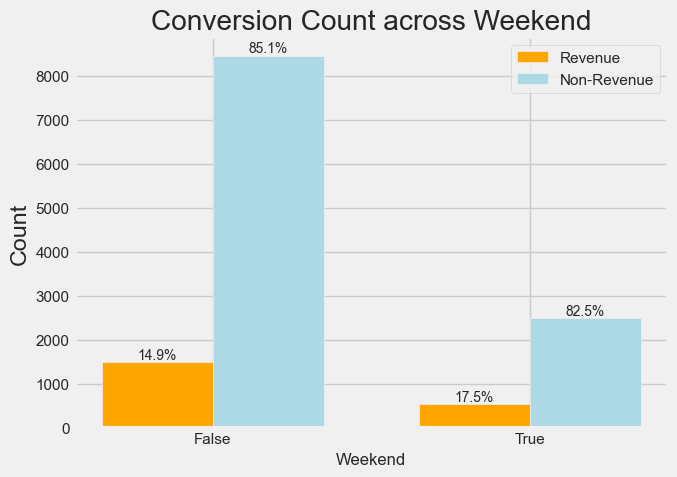

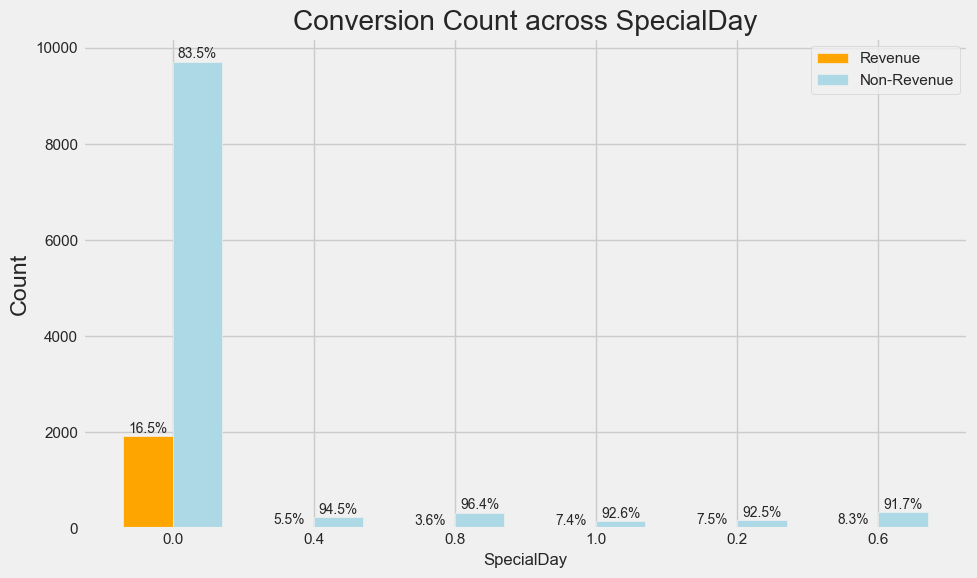

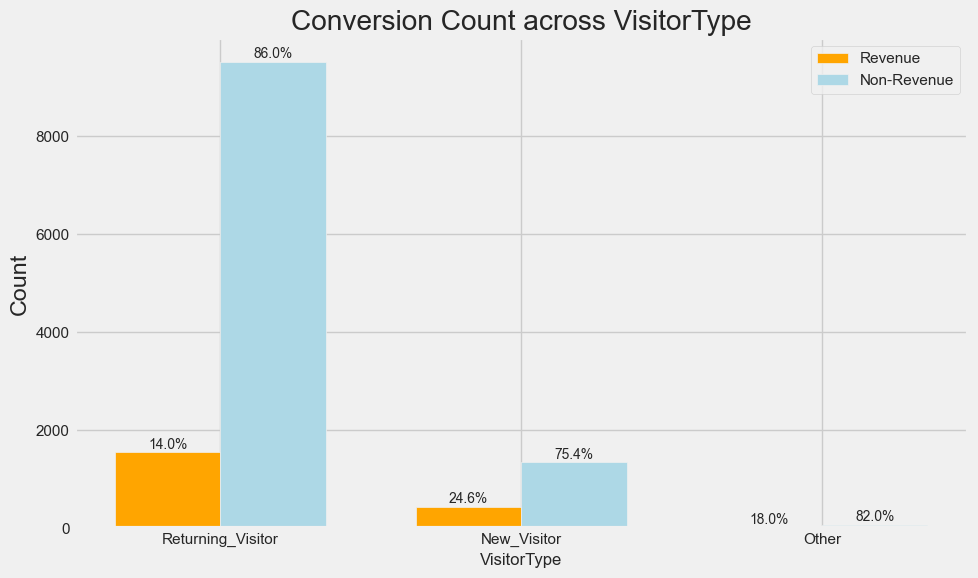

In [14]:
# Create plot for Region Weekend SpecialDay and VisitorType

# Define the function for plotting grouped bar charts with count on y-axis and percentage labels
def plot_grouped_bar_chart(feature_values, feature_name, figsize=(10, 6)):
    # Initialize counts for revenue and non-revenue visitors
    revenue_counts = []
    non_revenue_counts = []
    total_counts = []

    # Iterate over each feature value
    for value in feature_values:
        # Subset data for current feature value
        subset_data = df[df[feature_name] == value]
        total_count = subset_data.shape[0]
        
        # Count revenue and non-revenue visitors
        revenue_count = subset_data[subset_data['Revenue'] == True].shape[0]
        non_revenue_count = subset_data[subset_data['Revenue'] == False].shape[0]
        
        # Append counts to lists
        revenue_counts.append(revenue_count)
        non_revenue_counts.append(non_revenue_count)
        total_counts.append(total_count)

    # Initialize figure and axes
    fig, ax = plt.subplots(figsize=figsize)

    # Initialize index for x-axis
    index = np.arange(len(feature_values))
    bar_width = 0.35

    # Plot grouped bar chart
    bar1 = ax.bar(index, revenue_counts, bar_width, label='Revenue', color='orange')
    bar2 = ax.bar(index + bar_width, non_revenue_counts, bar_width, label='Non-Revenue', color='lightblue')

    # Add annotations for percentage
    for i, (revenue_count, non_revenue_count, total_count) in enumerate(zip(revenue_counts, non_revenue_counts, total_counts)):
        revenue_percentage = (revenue_count / total_count) * 100 if total_count > 0 else 0
        non_revenue_percentage = (non_revenue_count / total_count) * 100 if total_count > 0 else 0
        
        ax.text(i, revenue_count + 10, f'{revenue_percentage:.1f}%', ha='center', va='bottom', fontsize=10)
        ax.text(i + bar_width, non_revenue_count + 10, f'{non_revenue_percentage:.1f}%', ha='center', va='bottom', fontsize=10)

    # Add labels, title, and legend
    ax.set_xlabel(feature_name, fontsize=12)
    ax.set_ylabel('Count')
    ax.set_title(f'Conversion Count across {feature_name}')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(feature_values)
    ax.legend()

    plt.tight_layout()
    plt.show()

# Usage for different categorical features excluding 'Browser', 'OperatingSystems', and 'TrafficType'
plot_grouped_bar_chart(df['Region'].unique(), 'Region')
plot_grouped_bar_chart(df['Weekend'].unique(), 'Weekend', figsize=(7, 5))
plot_grouped_bar_chart(df['SpecialDay'].unique(), 'SpecialDay', figsize=(10, 6))
plot_grouped_bar_chart(df['VisitorType'].unique(), 'VisitorType', figsize=(10, 6))


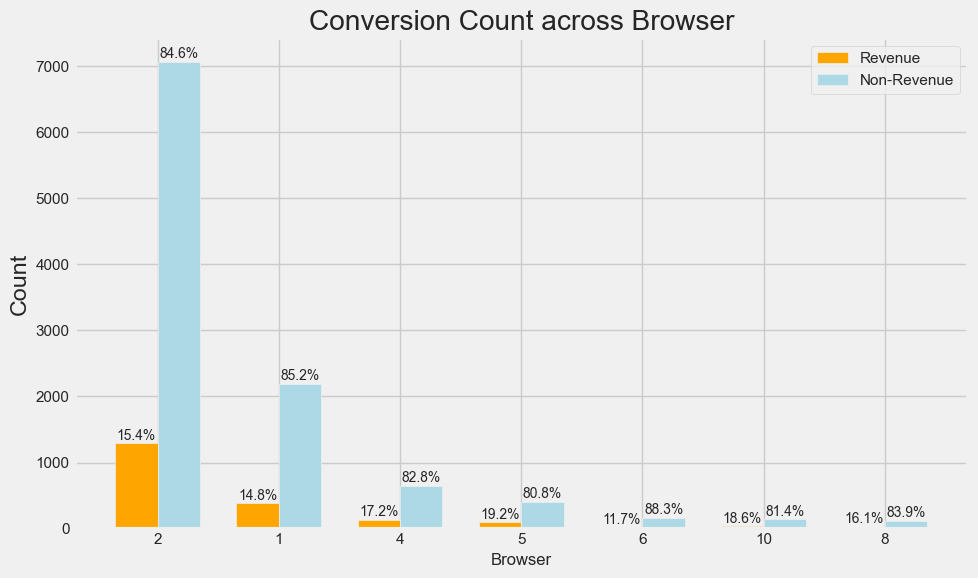

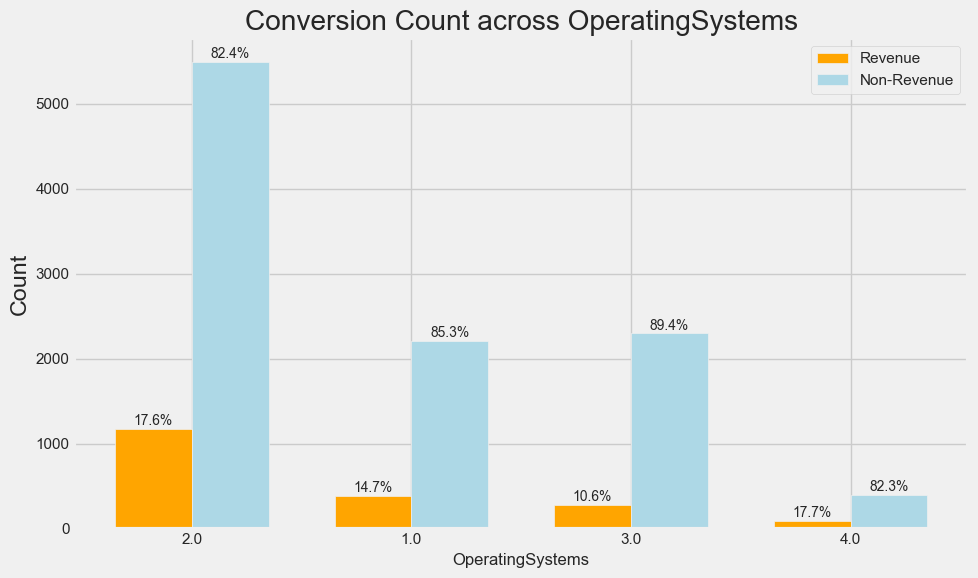

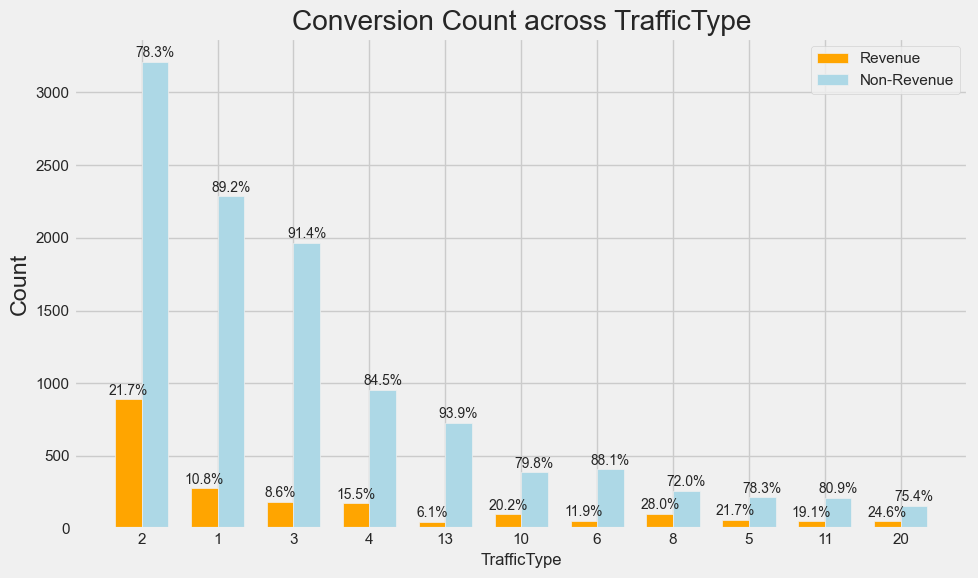

In [15]:
# Create plot for Browser, OperatingSystems, and TrafficType with unique values where the count is greater than 1% of the total

def plot_grouped_bar_chart_with_threshold(df, feature_name, figsize=(10, 6), threshold=0.01):
    # Calculate the total number of entries in the dataframe
    total_entries = df.shape[0]
    
    # Filter unique values based on count > threshold (1% of total entries)
    value_counts = df[feature_name].value_counts()
    filtered_values = value_counts[value_counts > threshold * total_entries].index
    
    # Initialize counts for revenue and non-revenue visitors
    revenue_counts = []
    non_revenue_counts = []
    total_counts = []

    # Iterate over each filtered feature value
    for value in filtered_values:
        # Subset data for current feature value
        subset_data = df[df[feature_name] == value]
        total_count = subset_data.shape[0]
        
        # Count revenue and non-revenue visitors
        revenue_count = subset_data[subset_data['Revenue'] == True].shape[0]
        non_revenue_count = subset_data[subset_data['Revenue'] == False].shape[0]
        
        # Append counts to lists
        revenue_counts.append(revenue_count)
        non_revenue_counts.append(non_revenue_count)
        total_counts.append(total_count)

    # Initialize figure and axes
    fig, ax = plt.subplots(figsize=figsize)

    # Initialize index for x-axis
    index = np.arange(len(filtered_values))
    bar_width = 0.35

    # Plot grouped bar chart
    bar1 = ax.bar(index, revenue_counts, bar_width, label='Revenue', color='orange')
    bar2 = ax.bar(index + bar_width, non_revenue_counts, bar_width, label='Non-Revenue', color='lightblue')

    # Add annotations for percentage
    for i, (revenue_count, non_revenue_count, total_count) in enumerate(zip(revenue_counts, non_revenue_counts, total_counts)):
        revenue_percentage = (revenue_count / total_count) * 100 if total_count > 0 else 0
        non_revenue_percentage = (non_revenue_count / total_count) * 100 if total_count > 0 else 0
        
        ax.text(i, revenue_count + 10, f'{revenue_percentage:.1f}%', ha='center', va='bottom', fontsize=10)
        ax.text(i + bar_width, non_revenue_count + 10, f'{non_revenue_percentage:.1f}%', ha='center', va='bottom', fontsize=10)

    # Add labels, title, and legend
    ax.set_xlabel(feature_name, fontsize=12)
    ax.set_ylabel('Count')
    ax.set_title(f'Conversion Count across {feature_name}')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(filtered_values)
    ax.legend()

    plt.tight_layout()
    plt.show()

# Usage for features 'Browser', 'OperatingSystems', and 'TrafficType' with count > 1% of total entries
plot_grouped_bar_chart_with_threshold(df, 'Browser')
plot_grouped_bar_chart_with_threshold(df, 'OperatingSystems')
plot_grouped_bar_chart_with_threshold(df, 'TrafficType')


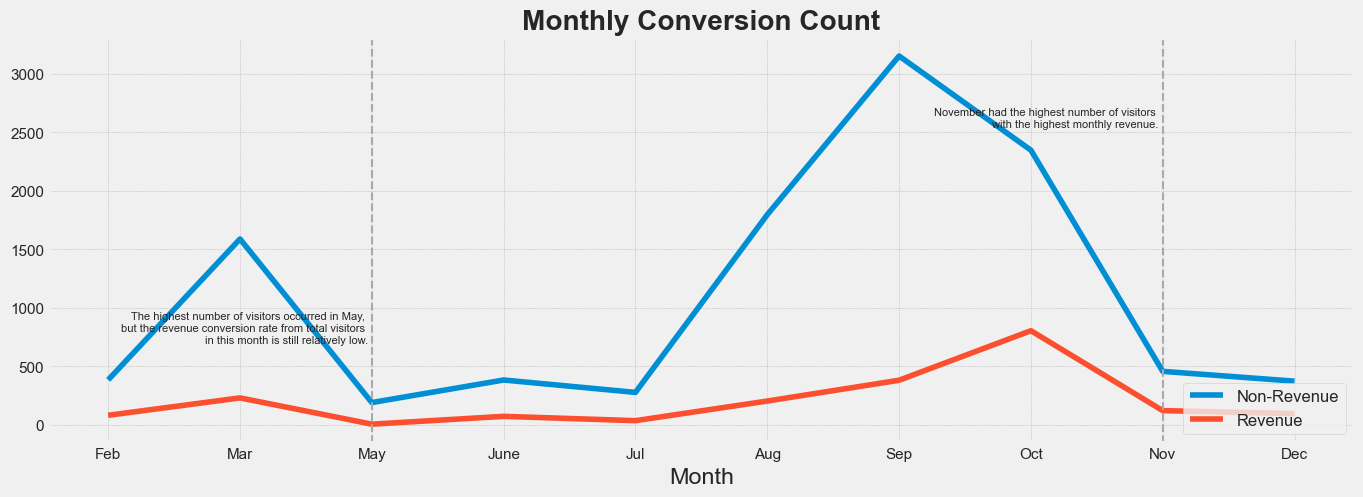

In [19]:
# Create time series chart to show revenue distribution across months
## Define categories for 'Month'
val_month = ['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Group by 'Month' and 'Revenue' to get counts
df_grouped = df.groupby(['Month', 'Revenue']).size().unstack(fill_value=0)

# Plotting total visitors per month by revenue
ax = df_grouped.plot(kind='line', figsize=(15,5))

# Set plot title
plt.title('Monthly Conversion Count', fontweight='bold')

# Set x-axis label
plt.xlabel('Month')

# Show legend at lower right corner with fontsize 12
plt.legend(['Non-Revenue', 'Revenue'], loc='lower right', fontsize=12)

# Add gridlines with specified color, linestyle, and linewidth
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)

# Set x-ticks positions and labels using the defined 'val_month' (months)
ax.set_xticks(range(len(val_month)))
ax.set_xticklabels(val_month) 

# Add vertical lines at specific months for visual reference
plt.axvline(x=2, color='darkgrey', ls='--', lw=1.5)  # May
plt.axvline(x=8, color='darkgrey', ls='--', lw=1.5)  # Nov

# Add text annotations at specific coordinates
plt.text(1.97, 700, s='The highest number of visitors occurred in May, \nbut the revenue conversion rate from total visitors \nin this month is still relatively low.', 
         fontsize=8, ha='right')

plt.text(7.97, 2550, s='November had the highest number of visitors \nwith the highest monthly revenue.', 
         fontsize=8, ha='right')

# Show the plot
plt.show()


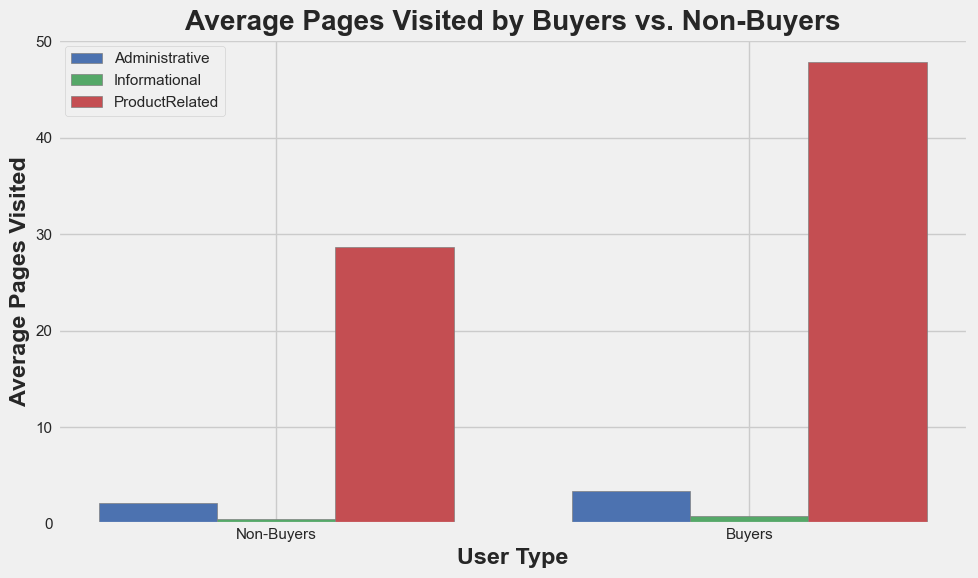

In [10]:
# Create chart showing the distribution of revenue across three interactional pages
pages = df.groupby('Revenue')[['Administrative', 'Informational', 'ProductRelated']].mean().reset_index()

# Change values of Revenue column to be more readable
pages.loc[pages['Revenue'] == True, 'Revenue'] = 'Buyers'
pages.loc[pages['Revenue'] == False, 'Revenue'] = 'Non-Buyers'

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Set the number of bars per group
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = np.arange(len(pages))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bars for each page type
ax.bar(r1, pages['Administrative'], color='b', width=bar_width, edgecolor='grey', label='Administrative')
ax.bar(r2, pages['Informational'], color='g', width=bar_width, edgecolor='grey', label='Informational')
ax.bar(r3, pages['ProductRelated'], color='r', width=bar_width, edgecolor='grey', label='ProductRelated')

# Add labels, title, and legend
ax.set_xlabel('User Type', fontweight='bold')
ax.set_ylabel('Average Pages Visited', fontweight='bold')
ax.set_title('Average Pages Visited by Buyers vs. Non-Buyers', fontweight='bold')

# Add the xticks
ax.set_xticks([r + bar_width for r in range(len(pages))])
ax.set_xticklabels(pages['Revenue'])

ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


# <b>Insights and Business Recommendations<b>


### <b>Visitor Types:<b>
#### Observation: 
"Returning Visitors" dominate in sheer numbers but have a lower average conversion rate compared to "New Visitors."
#### Recommendation:
Enhance Engagement for New Visitors: Increase marketing efforts and improve the user experience for "New Visitors" to leverage their higher conversion rates.<br>
Segmented Strategies: Develop targeted campaigns to convert "Returning Visitors" by offering personalized promotions or incentives to boost their conversion rates.

### <b>Peak Revenue Months:<b>
#### Observation: 
November leads with the highest conversions (803), followed by May (379) and March (201). February shows the lowest conversions (3).
#### Recommendation:
Intensify Marketing in Peak Months: Focus promotional activities and campaigns during November, May, and March to maximize revenue during these high-performing periods.<br>
Analyze and Address Low Performance: Investigate the factors behind February's low conversions and consider enhanced promotional strategies or special offers during this month to improve performance.


### <b>Days of the Week:<b>
#### Observation: 
Weekends, although hosting fewer visitors, show a higher average conversion rate compared to weekdays.
#### Recommendation:
Weekend Marketing Strategies: Implement targeted marketing and promotions specifically for weekends to capitalize on higher conversion rates.<br>
Optimize Weekend Offers: Create exclusive weekend deals or discounts to further increase conversion rates during these days.


### <b>Operating System:<b>
#### Observation: 
Operating System 2 correlates significantly with higher conversion rates.
#### Recommendation:
Optimize for Preferred Platforms: Ensure your website and user experience are optimized for Operating System 2 to maintain and enhance high conversion rates.<br>
Test Compatibility: Regularly test and optimize your site across other operating systems to ensure a seamless experience for all users.


### <b>Special Days:<b>
#### Observation: 
pecial days show minimal impact on conversions.
#### Recommendation:
Selective Special Day Promotions: Focus special day promotions only in high-performing months or when there are significant opportunities, rather than broadly targeting all special days.<br>
Evaluate Effectiveness: Reassess the impact of special day promotions and allocate resources based on effectiveness.


### <b>Browser:<b>
#### Observation: 
Browser 2 is the preferred choice among the majority of visitors.
#### Recommendation:
Optimize for Browser 2: Ensure the best possible user experience and performance on Browser 2, as it is favored by most visitors.<br>
Cross-Browser Testing: Regularly test and optimize your site across different browsers to ensure a consistent experience for all users.


### <b>Region:<b>
#### Observation: 
Region 1 is the top performer in both visitor numbers and total conversions.
#### Recommendation:
Focus Marketing Efforts on Region 1: Increase targeted marketing campaigns and personalized promotions in Region 1 to further boost engagement and conversions.<br>
Expand Strategies to Other Regions: Develop strategies to replicate the success of Region 1 in other high-potential regions like Region 3 and 2.


### <b>Traffic Type:<b>
#### Observation: 
Traffic Type 2 drives high visitor volume but has a low average conversion rate.
#### Recommendation:
Enhance Conversion Strategies for Traffic Type 2: Develop targeted promotions or discounts to increase conversions from this traffic type.<br>
Evaluate Traffic Source Quality: Investigate the sources driving Traffic Type 2 and optimize or diversify to improve overall conversion rates.



# <b>Data Pre Processing<b>

## Handling Outliers

In [21]:
from scipy import stats

columns = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'ExitRates']

outlier_percentages = {}

for column in columns:
    # Calculate z-scores
    z_scores = stats.zscore(df[column].dropna())
    
    # Identify outliers
    outliers = abs(z_scores) > 3
    
    # Calculate percentage of outliers
    outlier_percentage = (sum(outliers) / len(df[column])) * 100
    
    # Store the result
    outlier_percentages[column] = outlier_percentage

print(outlier_percentages)


{'Administrative': 1.6993665997219218, 'Administrative_Duration': 1.7843349297080178, 'Informational': 2.070137494206705, 'Informational_Duration': 1.822956897883516, 'ProductRelated': 1.9079252278696124, 'ProductRelated_Duration': 1.6993665997219218, 'ExitRates': 5.85509037540553}


In [22]:
from scipy import stats
columns = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']

# Compute z-scores for each column and handle missing values
z_scores = pd.DataFrame(index=df.index)  # Initialize DataFrame with the same index as df

for column in columns:
    # Calculate z-scores while keeping the index aligned
    z_scores[column] = stats.zscore(df[column].fillna(0))  # Replace NaN with 0 for z-score computation

# Create a mask for outliers based on z-score threshold of ±3
outlier_mask = (abs(z_scores) > 3).any(axis=1)

# Filter out rows where any column has an outlier
df_cleaned = df[~outlier_mask]

print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")

Original DataFrame shape: (12946, 18)
Cleaned DataFrame shape: (11985, 18)


## Feature Encoding

### One-Hot Encoding

In [23]:
onehots = pd.get_dummies(df_cleaned['VisitorType'], prefix='VisitorType', prefix_sep='_')

# Bergabungkan one-hot encoded columns dengan DataFrame
df_cleaned = df_cleaned.join(onehots)

# Mengganti nilai True=1 dan False=0 secara manual jika diperlukan
df_cleaned.replace({True: 1, False: 0}, inplace=True)

# Hapus kolom VisitorType_isOther karena sudah tidak dibutuhkan
df_cleaned.drop('VisitorType_Other', axis=1, inplace=True)

### Label Encoding

In [24]:
# Convert columns with boolean values to integer
df_cleaned[['Weekend', 'Revenue']] = df_cleaned[['Weekend', 'Revenue']].apply(lambda x: x.astype(int))

# Convert column SpecialDay into integer (value = 1 if special days otherwise value = 0)
df_cleaned['SpecialDay'] = np.where(df_cleaned['SpecialDay'] > 0, 1, 0)

# Define custom mapping from month names to numerical labels
month_mapping = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'June': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

# Apply mapping using map function
df_cleaned['Month'] = df_cleaned['Month'].map(month_mapping)

## Drop Nulls and Duplicates

In [25]:
# drop duplicates
df_cleaned = df_cleaned.drop_duplicates()
# drop null values
df_cleaned = df_cleaned.dropna()
# check null values
df_cleaned.isna().sum()

Administrative                   0
Administrative_Duration          0
Informational                    0
Informational_Duration           0
ProductRelated                   0
ProductRelated_Duration          0
BounceRates                      0
ExitRates                        0
PageValues                       0
SpecialDay                       0
Month                            0
OperatingSystems                 0
Browser                          0
Region                           0
TrafficType                      0
VisitorType                      0
Weekend                          0
Revenue                          0
VisitorType_New_Visitor          0
VisitorType_Returning_Visitor    0
dtype: int64

In [26]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9675 entries, 0 to 12329
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 9675 non-null   float64
 1   Administrative_Duration        9675 non-null   float64
 2   Informational                  9675 non-null   int64  
 3   Informational_Duration         9675 non-null   float64
 4   ProductRelated                 9675 non-null   int64  
 5   ProductRelated_Duration        9675 non-null   float64
 6   BounceRates                    9675 non-null   float64
 7   ExitRates                      9675 non-null   float64
 8   PageValues                     9675 non-null   float64
 9   SpecialDay                     9675 non-null   int64  
 10  Month                          9675 non-null   int64  
 11  OperatingSystems               9675 non-null   float64
 12  Browser                        9675 non-null   int64

## Feature Selection

In [27]:
from sklearn.feature_selection import f_classif
X_columns = ['Administrative', 'Administrative_Duration', 'Informational',
             'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
             'BounceRates', 'ExitRates', 'PageValues','Month', 'OperatingSystems', 
             'Browser', 'Region', 'TrafficType', 'VisitorType_Returning_Visitor', 'VisitorType_New_Visitor', 'Weekend', 'SpecialDay']
# Numerical features
X = df_cleaned[X_columns]
y = df_cleaned['Revenue']

# Compute ANOVA F-value and p-values
f_scores, p_values = f_classif(X, y)

# Create a DataFrame to display results
results = pd.DataFrame({'Feature': X_columns, 'F-Score': f_scores, 'P-Value': p_values})

# Sort the results by F-score in descending order
results_sorted_by_fscore = results.sort_values(by='F-Score', ascending=False)

# Print the sorted table
print(results_sorted_by_fscore)

                          Feature      F-Score       P-Value
8                      PageValues  3550.250560  0.000000e+00
7                       ExitRates   433.740282  2.863626e-94
5         ProductRelated_Duration   295.277927  3.252904e-65
4                  ProductRelated   248.770305  2.349557e-55
6                     BounceRates   211.584499  1.959528e-47
0                  Administrative   167.996836  4.203252e-38
15        VisitorType_New_Visitor   146.280778  1.963333e-33
14  VisitorType_Returning_Visitor   145.776040  2.521715e-33
9                           Month   136.984237  1.978968e-31
1         Administrative_Duration   136.272194  2.818405e-31
3          Informational_Duration    84.533553  4.558557e-20
2                   Informational    80.293691  3.824260e-19
17                     SpecialDay    71.275471  3.553308e-17
11                        Browser     9.178350  2.455413e-03
16                        Weekend     8.918901  2.829414e-03
10               Operati

### Reasons of Selection
The feature PageValues has the highest p-value but also shows a high probability of multicollinearity with our target variable, as indicated by the correlation heatmap. Therefore, this feature will be excluded. ExitRates will be used instead of BounceRate since they are redundant, and ExitRates shows higher P-value. Among the three sets of page and duration features, redundancy is also observed; hence, only one feature from each set will be selected based on the highest p-values they exhibit. Lastly, both VisitorType features will be included. The remaining features are not relevant to revenue generation and show low P-values therefore they will be excluded.

# **Data Splitting**

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assign features and target variable
X = df_cleaned[['Administrative', 'Informational_Duration', 'ProductRelated_Duration', 'ExitRates', 'Month', 'VisitorType_Returning_Visitor', 'VisitorType_New_Visitor']]
y = df_cleaned['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize SMOTE
smote = SMOTE(random_state=42, sampling_strategy='minority')

# Apply SMOTE to the training data
X_train, y_train = smote.fit_resample(X_train, y_train)

print('SMOTE')
print(pd.Series(y_train).value_counts())

SMOTE
Revenue
0    5768
1    5768
Name: count, dtype: int64


# <b>Modelling<b>
*Using Recall evaluation to catch as much as true positive (buyers) as possible

In [29]:
# Scaling data with robust scaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [30]:
# Scale X for cross evaluation
X_scaled = scaler.fit_transform(X)

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate, cross_val_predict

def eval_classification(model):
    # Fit the model
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)
    y_pred_proba_train = model.predict_proba(X_train_scaled)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    
    score = cross_validate(model, X_scaled, y, cv=5, scoring='recall', return_train_score=True)
    print('recall (crossval train): ' + str(score['train_score'].mean()))
    print('recall (crossval test): ' + str(score['test_score'].mean()))



def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())


In [32]:
from sklearn.linear_model import LogisticRegression 

# Train logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

# Evaluate model
eval_classification(logreg)

Accuracy (Test Set): 0.65
Accuracy (Train Set): 0.70
Precision (Test Set): 0.26
Precision (Train Set): 0.72
Recall (Test Set): 0.74
Recall (Train Set): 0.67
F1-Score (Test Set): 0.38
F1-Score (Train Set): 0.69
roc_auc (test-proba): 0.75
roc_auc (train-proba): 0.80
recall (crossval train): 0.01691186522028379
recall (crossval test): 0.018118466898954706


In [34]:
# Hyper parameter tuning 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'None'],
    'C': [float(x) for x in np.linspace(0.0001, 0.01)],
    'solver': ['liblinear', 'saga', 'sag', 'lbfgs', 'newton-cg'],
    'random_state': [42]
}

# Create a scorer for recall
scorer = make_scorer(recall_score)

# Initialize GridSearchCV with recall as the scoring metric
grid_search = GridSearchCV(
    estimator=LogisticRegression(class_weight='balanced'),
    param_grid=param_grid,
    scoring=scorer,
    cv=5
)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best estimator found by grid search
best_clf = grid_search.best_estimator_

# Predict probabilities on the test set
y_prob = best_clf.predict_proba(X_test_scaled)[:, 1]

# Evaluate model
eval_classification(grid_search)
show_best_hyperparameter(grid_search)

Accuracy (Test Set): 0.51
Accuracy (Train Set): 0.68
Precision (Test Set): 0.22
Precision (Train Set): 0.64
Recall (Test Set): 0.92
Recall (Train Set): 0.82
F1-Score (Test Set): 0.36
F1-Score (Train Set): 0.72
roc_auc (test-proba): 0.75
roc_auc (train-proba): 0.74
recall (crossval train): 0.8484997979883897
recall (crossval test): 0.8326356570259008
{'C': 0.002120408163265306, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': 42, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


param value: 1e-05; train: 1.0; test: 1.0
param value: 0.00011090909090909092; train: 0.2529472954230236; test: 0.2441860465116279
param value: 0.00021181818181818183; train: 0.20683079056865464; test: 0.2186046511627907
param value: 0.0003127272727272728; train: 0.20839112343966712; test: 0.2186046511627907
param value: 0.0004136363636363637; train: 0.7265950069348127; test: 0.8348837209302326
param value: 0.0005145454545454546; train: 0.8092926490984743; test: 0.9116279069767442
param value: 0.0006154545454545456; train: 0.8210818307905686; test: 0.9162790697674419
param value: 0.0007163636363636364; train: 0.8245492371705964; test: 0.9209302325581395
param value: 0.0008172727272727274; train: 0.8250693481276006; test: 0.9209302325581395
param value: 0.0009181818181818183; train: 0.8248959778085991; test: 0.9186046511627907
param value: 0.0010190909090909092; train: 0.8245492371705964; test: 0.9186046511627907
param value: 0.0011200000000000001; train: 0.8233356449375867; test: 0.918

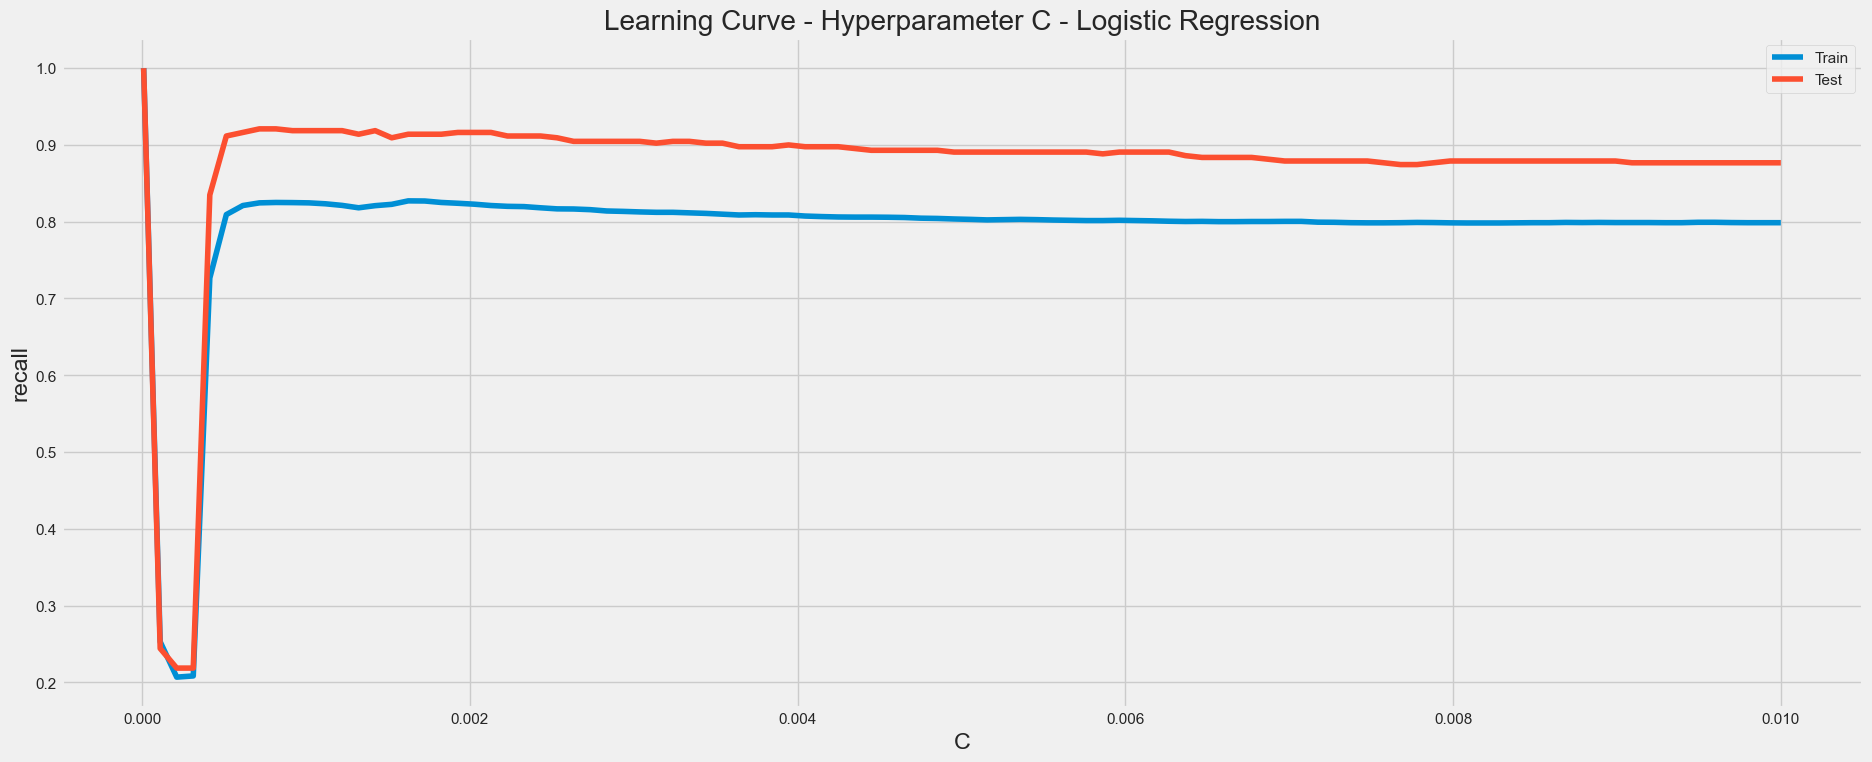

In [79]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score

def draw_learning_curve_recall(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression( C=c, penalty= 'l1', solver= 'saga', random_state= 42)
        model.fit(X_train_scaled, y_train)

        # eval on train
        y_pred_train = model.predict(X_train_scaled)
        train_recall = recall_score(y_train, y_pred_train)
        train_scores.append(train_recall)

        # eval on test
        y_pred_test = model.predict(X_test_scaled)
        test_recall = recall_score(y_test, y_pred_test)
        test_scores.append(test_recall)

        print('param value: ' + str(c) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('recall')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

# Learning curve to find best C value
param_values = [float(x) for x in np.linspace(0.00001, 0.01, 100)]
draw_learning_curve_recall(param_values)

In [33]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression with best estimator with modified C based on learning curve
best_model = LogisticRegression(
    C=  0.0021,
    class_weight='balanced',
    dual=False,
    fit_intercept=True,
    intercept_scaling=1,
    l1_ratio= None,
    max_iter=100,
    multi_class='auto',
    n_jobs=None,
    penalty='l1',
    random_state=42,
    solver='saga',
    tol=0.0001,
    verbose=0,
    warm_start=False
)

best_model.fit(X_train_scaled, y_train)

# Evaluate model
eval_classification(best_model)

Accuracy (Test Set): 0.51
Accuracy (Train Set): 0.68
Precision (Test Set): 0.22
Precision (Train Set): 0.64
Recall (Test Set): 0.92
Recall (Train Set): 0.82
F1-Score (Test Set): 0.36
F1-Score (Train Set): 0.72
roc_auc (test-proba): 0.75
roc_auc (train-proba): 0.74
recall (crossval train): 0.7935852959849814
recall (crossval test): 0.7831826709875489


In [35]:
from sklearn.metrics import confusion_matrix
y_pred_cv = cross_val_predict(grid_search, X_scaled, y, cv=5)

# Confusion Matrix
cm = confusion_matrix(y, y_pred_cv)
TN, FP, FN, TP = cm.ravel()
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")

True Positives (TP): 1194
False Positives (FP): 4258
True Negatives (TN): 3983
False Negatives (FN): 240


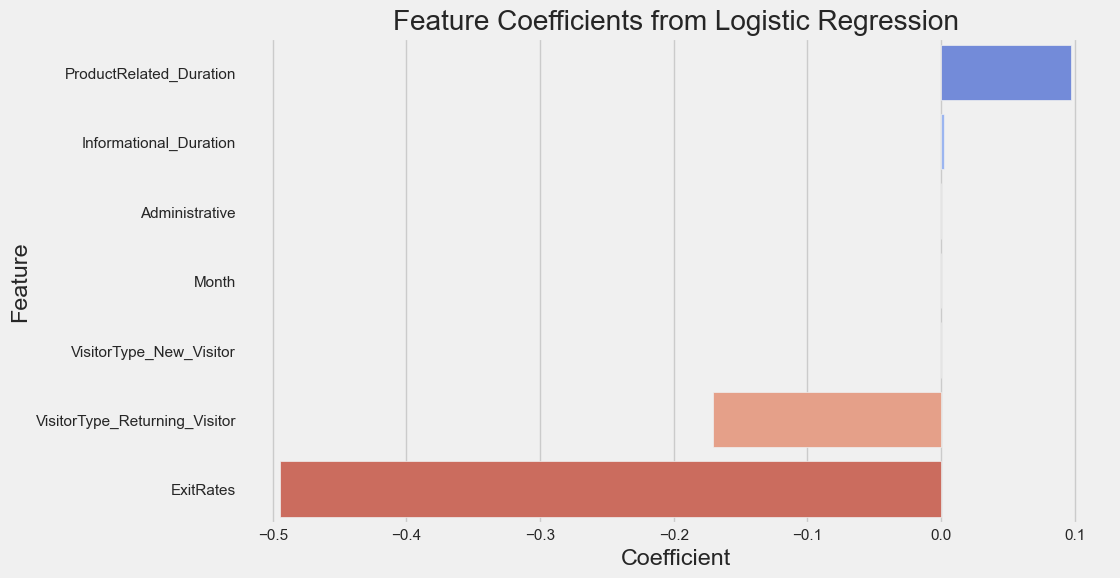

In [36]:

# Access the coefficients
coefficients = best_model.coef_[0]  # For binary classification, model.coef_ has shape (1, n_features)

# Pair coefficients with their respective feature names
feature_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})
# Sort the features by coefficient value
feature_coefficients = feature_coefficients.sort_values(by='Coefficient', ascending=False)

# Plot the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_coefficients, palette='coolwarm')
plt.title('Feature Coefficients from Logistic Regression')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

In [37]:
feature_coefficients

,Feature,Coefficient
2,ProductRelated_Duration,0.097390
1,Informational_Duration,0.001943
0,Administrative,0.000000
4,Month,0.000000
6,VisitorType_New_Visitor,0.000000
5,VisitorType_Returning_Visitor,-0.170846
3,ExitRates,-0.494225


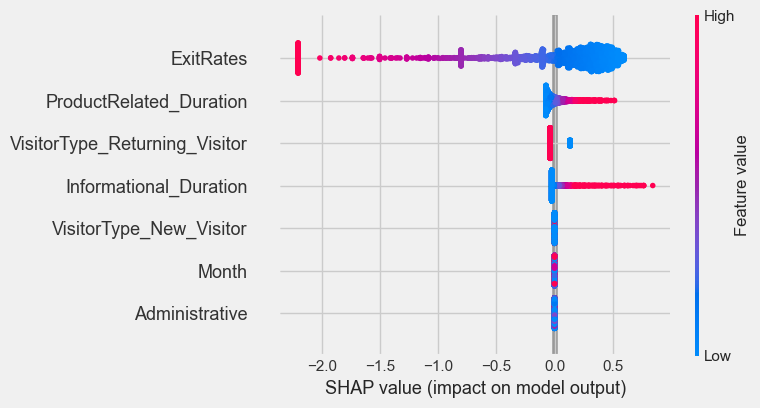

In [38]:
import shap
import numpy as np
from sklearn.linear_model import LogisticRegression
import shap

feature_names = ['Administrative', 'Informational_Duration', 'ProductRelated_Duration', 'ExitRates', 'Month', 'VisitorType_Returning_Visitor', 'VisitorType_New_Visitor']


# Menggunakan SHAP LinearExplainer untuk menjelaskan model
explainer = shap.LinearExplainer(best_model, X_train_scaled)

# Hitung SHAP values
shap_values = explainer.shap_values(X_test_scaled)

# Plot nilai SHAP
shap.summary_plot(shap_values, X_test_scaled, feature_names=feature_names)

In [39]:
shap_values[0]

array([ 0.        ,  0.18591852, -0.02593439,  0.4321368 , -0.        ,
        0.13326016,  0.        ])

# <b>Insights besed on model outcome<b>

### ExitRates: 
This feature has the most negative coefficient, suggesting that higher exit rates are strongly associated with a decrease in the target variable, likely indicating a negative outcome such as lower conversions or revenue. To improve outcomes, focus on reducing exit rates. This could involve enhancing the user experience on critical pages where users are most likely to exit, such as by optimizing page load times, simplifying navigation, and improving the relevance and clarity of content.


### VisitorType_Returning_Visitor
Returning visitors have a negative coefficient, indicating that they are less likely to contribute to the positive outcome compared to new visitors. This suggests that returning visitors might not be as effectively converting or contributing to the desired target metric. Reevaluate the strategies aimed at returning visitors. Consider offering personalized incentives, loyalty programs, or special promotions to better engage and convert these visitors.


### ProductRelated_Duration
This feature has a positive coefficient, indicating that more time spent on product-related pages is positively associated with the target outcome. It suggests that engaged users on these pages are more likely to convert or generate revenue. To leverage this positive impact, ensure that product-related pages are optimized for engagement. This could include providing clear product information, high-quality images, customer reviews, and easy navigation to related products or purchasing options.

### Informational_Duration
This feature has a small positive coefficient, indicating a slight positive impact on the target outcome when users spend more time on informational pages. Although the impact is small, enhancing the quality of informational content could further improve user engagement and potentially lead to better outcomes. Consider making these pages more informative and engaging, possibly with interactive content or related links.

### Administrative, Month, VisitorType_New_Visitor
These three features have coefficients of zero, indicating that they do not have a significant impact on the target variable in the current model. While these features may not be influential in this model, it's important to monitor their relevance in different contexts or future analyses. They might become more significant under different conditions or with additional data.
